<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## Density-Based Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository. They can be skipped if data is available locally.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


# Density-Based Clustering

## Preliminary

In [24]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from itertools import product
from datetime import datetime

In [4]:
df_clustering_dbscan = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

### Dataset Cleaning and Selection

In [5]:
df_clustering_dbscan['state'].value_counts()

Illinois         10594
Florida           7537
California        7231
Texas             5740
Ohio              5411
Georgia           4672
Pennsylvania      4644
Tennessee         3787
Missouri          3660
Maryland          3342
Louisiana         3269
Massachusetts     3258
Indiana           3052
Wisconsin         2947
Michigan          2921
Virginia          2761
Alabama           2583
Kentucky          2095
Connecticut       1917
Washington        1704
Colorado          1644
Arkansas          1624
Iowa              1506
Mississippi       1476
Oregon            1412
Kansas            1181
Oklahoma          1112
Arizona           1025
Nevada             905
Minnesota          780
Nebraska           722
Maine              600
Utah               505
Idaho              331
Vermont            219
Delaware           138
Alaska              16
Name: state, dtype: int64

In [81]:
df_clustering_dbscan_alabama = df_clustering_dbscan[df_clustering_dbscan['state'] == 'Alabama'].drop(columns=['state', 'state_congressional_district'])

In [82]:
df_clustering_dbscan_alabama.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
44,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,279.3,0.044444,0.0,0.000,0.000000
158,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,352.8,0.022222,0.0,0.000,0.000000
220,34.7442,-86.5912,26.0,0.0,15.8,0.0,0.000000,0.0,0.744241,410.8,0.000000,0.0,0.000,0.000000
222,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,604.8,0.086957,0.0,0.125,0.142857
339,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,367.5,0.136364,0.0,0.200,0.000000


As for KMeans, we will compare the results with `StandardScaler` and `MinMaxScaler`.

In [83]:
# Standardize the features
std_scaler, min_max_scaler = StandardScaler(), MinMaxScaler()
df_dbscan_std_scaled = std_scaler.fit_transform(df_clustering_dbscan_alabama)
df_dbscan_min_max_scaled = min_max_scaler.fit_transform(df_clustering_dbscan_alabama)

In [102]:
df_dbscan_normal = df_clustering_dbscan_alabama.to_numpy()

## DBScan without scaling

In [103]:
S = np.sqrt(np.sum(np.square(df_dbscan_normal), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[295.38832539 366.04131164 422.36007061 ... 330.13793903 664.10678858
 303.56198352]
199.96210633856742
1062.2891061411403
509.7016556966259


In [121]:
eps_values = np.array([4, 6, 8, 10, 12])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 21, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

20

In [122]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_normal)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score.append(silhouette_score(df_dbscan_normal, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score.append(None)

[26-11-2023 19:19:34] Starting DBScan with p = (4, 5)
[26-11-2023 19:19:34] Got 97 clusters. Starting to calculate silhouette_score with p = (4, 5)
[26-11-2023 19:19:34] Starting DBScan with p = (4, 10)
[26-11-2023 19:19:34] Got 67 clusters. Starting to calculate silhouette_score with p = (4, 10)
[26-11-2023 19:19:34] Starting DBScan with p = (4, 15)
[26-11-2023 19:19:34] Got 53 clusters. Starting to calculate silhouette_score with p = (4, 15)
[26-11-2023 19:19:34] Starting DBScan with p = (4, 20)
[26-11-2023 19:19:34] Got 44 clusters. Starting to calculate silhouette_score with p = (4, 20)
[26-11-2023 19:19:35] Starting DBScan with p = (6, 5)
[26-11-2023 19:19:35] Got 47 clusters. Starting to calculate silhouette_score with p = (6, 5)
[26-11-2023 19:19:35] Starting DBScan with p = (6, 10)
[26-11-2023 19:19:35] Got 43 clusters. Starting to calculate silhouette_score with p = (6, 10)
[26-11-2023 19:19:35] Starting DBScan with p = (6, 15)
[26-11-2023 19:19:35] Got 35 clusters. Starting t

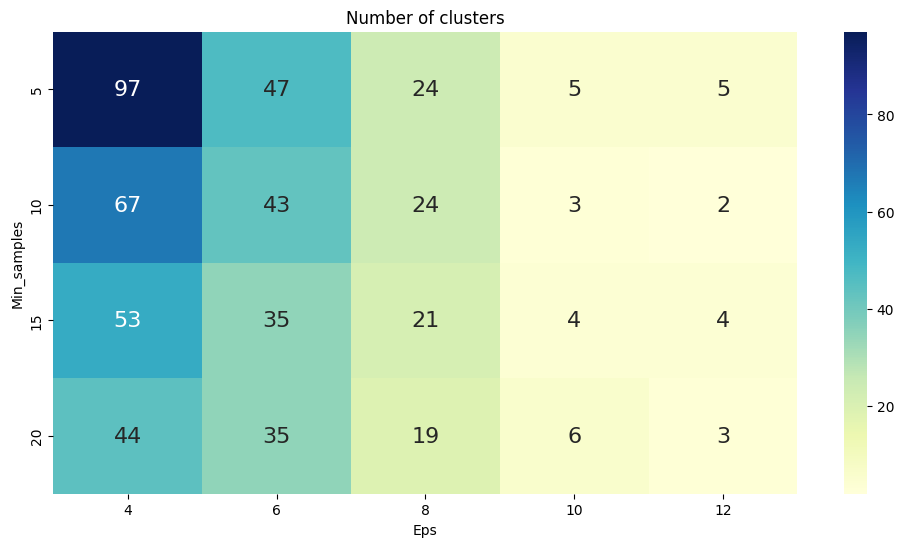

In [123]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

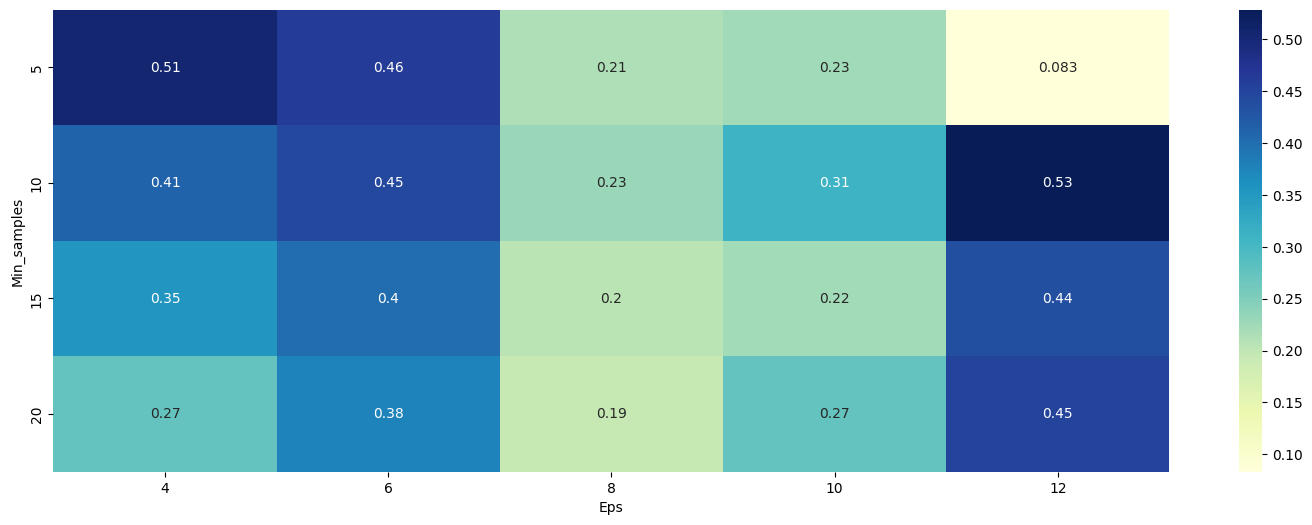

In [124]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, if we exclude the cases with $2$ clusters (which mean a single cluster and outliers) and the cases with more than $10$ clusters, global maximum is $0.31$ with $min\_samples = 10, eps = 10.0$ and $3$ clusters (including outliers).

In [132]:
DBS_clustering = DBSCAN(eps=10, min_samples=10).fit(df_dbscan_normal)

df_dbscan_alabama_normal_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_normal_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [133]:
df_dbscan_alabama_normal_clustered['Cluster'].value_counts()

 1    1919
 0     640
-1      24
Name: Cluster, dtype: int64

In [134]:
df_dbscan_alabama_normal_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
44,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,279.3,0.044444,0.0,0.000,0.000000,0
158,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,352.8,0.022222,0.0,0.000,0.000000,0
220,34.7442,-86.5912,26.0,0.0,15.8,0.0,0.000000,0.0,0.744241,410.8,0.000000,0.0,0.000,0.000000,1
222,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,604.8,0.086957,0.0,0.125,0.142857,1
339,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,367.5,0.136364,0.0,0.200,0.000000,1


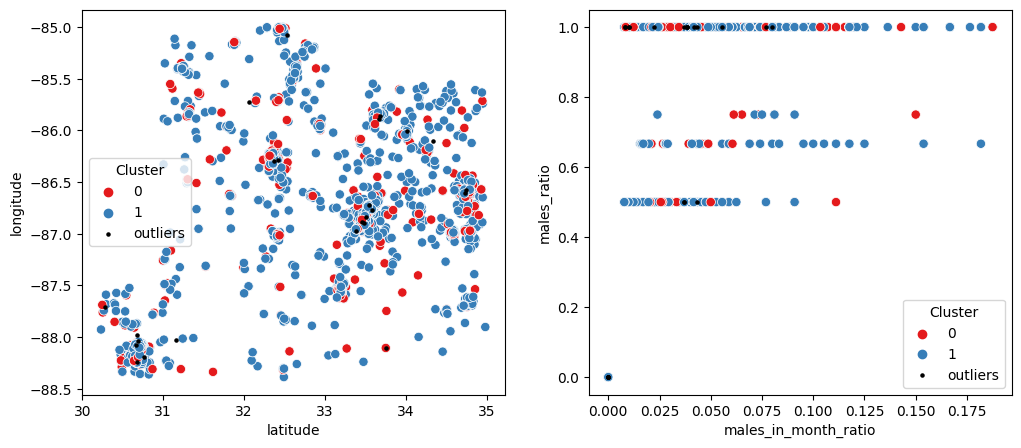

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()


## DBScan with StandardScaler

In [84]:
S = np.sqrt(np.sum(np.square(df_dbscan_std_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[3.57133137 3.482759   3.26310498 ... 3.10299072 2.57257497 2.631285  ]
1.5049995403412186
10.1068653344784
3.583576084211247


In [85]:
eps_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 41, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

104

In [86]:
no_of_clusters_std_scaler = []
sil_score_std_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_std_scaled)
  no_of_clusters_std_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_std_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_std_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_std_scaler.append(silhouette_score(df_dbscan_std_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_std_scaler.append(None)

[26-11-2023 18:34:18] Starting DBScan with p = (0.8, 5)
[26-11-2023 18:34:18] Got 54 clusters. Starting to calculate silhouette_score with p = (0.8, 5)
[26-11-2023 18:34:18] Starting DBScan with p = (0.8, 10)
[26-11-2023 18:34:19] Got 21 clusters. Starting to calculate silhouette_score with p = (0.8, 10)
[26-11-2023 18:34:19] Starting DBScan with p = (0.8, 15)
[26-11-2023 18:34:19] Got 11 clusters. Starting to calculate silhouette_score with p = (0.8, 15)
[26-11-2023 18:34:19] Starting DBScan with p = (0.8, 20)
[26-11-2023 18:34:19] Got 6 clusters. Starting to calculate silhouette_score with p = (0.8, 20)
[26-11-2023 18:34:19] Starting DBScan with p = (0.8, 25)
[26-11-2023 18:34:19] Got 5 clusters. Starting to calculate silhouette_score with p = (0.8, 25)
[26-11-2023 18:34:19] Starting DBScan with p = (0.8, 30)
[26-11-2023 18:34:20] Got 2 clusters. Starting to calculate silhouette_score with p = (0.8, 30)
[26-11-2023 18:34:20] Starting DBScan with p = (0.8, 35)
[26-11-2023 18:34:20] Go

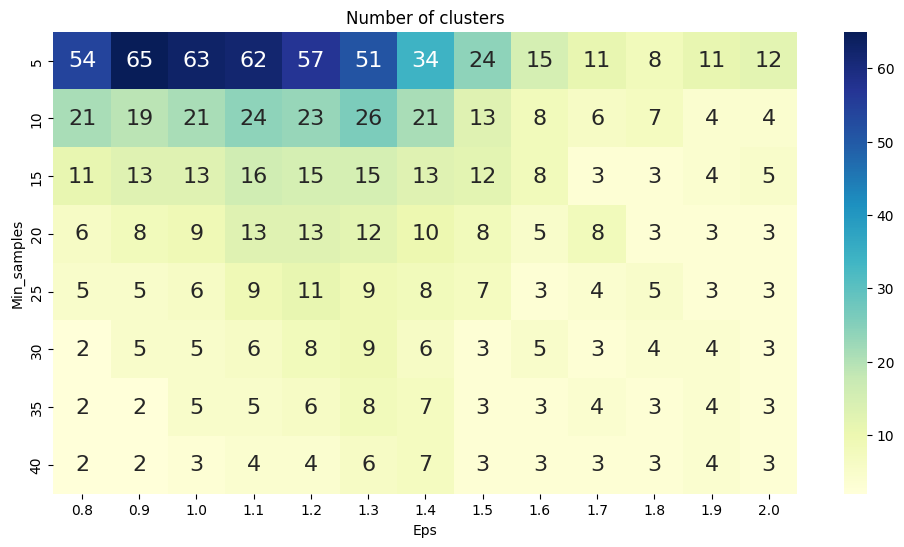

In [87]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_std_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

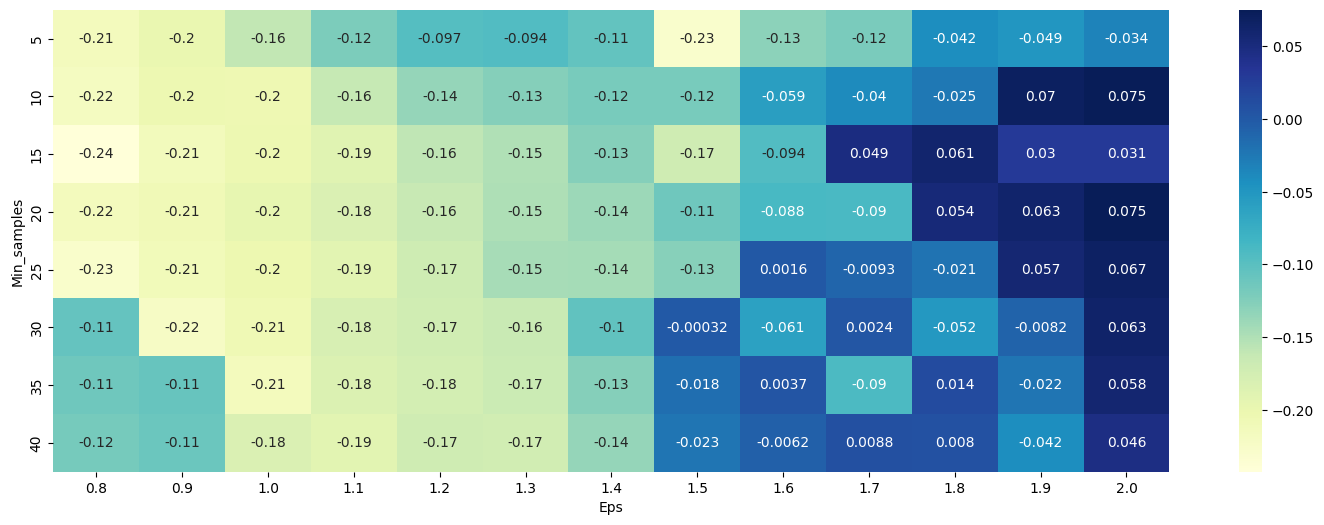

In [88]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_std_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, global maximum is $0.075$ with $min\_samples = 10, eps = 2.0$ and $4$ clusters (including outliers).

In [89]:
DBS_clustering = DBSCAN(eps=2.0, min_samples=10).fit(df_dbscan_std_scaled)

df_dbscan_alabama_std_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_std_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [137]:
df_dbscan_alabama_std_clustered['Cluster'].value_counts()

 0    2034
-1     400
 1     139
 2      10
Name: Cluster, dtype: int64

In [91]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
44,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,279.3,0.044444,0.0,0.000,0.000000,0
158,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,352.8,0.022222,0.0,0.000,0.000000,0
220,34.7442,-86.5912,26.0,0.0,15.8,0.0,0.000000,0.0,0.744241,410.8,0.000000,0.0,0.000,0.000000,0
222,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,604.8,0.086957,0.0,0.125,0.142857,-1
339,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,367.5,0.136364,0.0,0.200,0.000000,-1


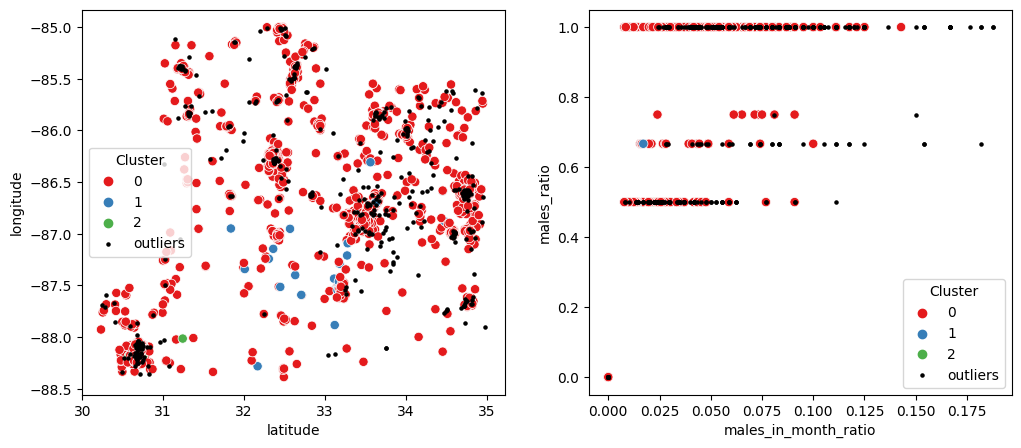

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()


## DBScan with MinMaxScaler

In [48]:
S = np.sqrt(np.sum(np.square(df_dbscan_min_max_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[1.4248457  1.42492602 1.37234457 ... 1.98393377 1.78357495 1.67602438]
0.35284057695613924
2.8208596733957347
1.8073459994875225


In [138]:
eps_values = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])  # eps values to be investigated (18 combinations)
min_samples = np.arange(10, 110, 10)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

80

In [139]:
no_of_clusters_min_max_scaler = []
sil_score_min_max_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_min_max_scaled)
  no_of_clusters_min_max_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_min_max_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_min_max_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_min_max_scaler.append(silhouette_score(df_dbscan_min_max_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_min_max_scaler.append(None)

[26-11-2023 19:26:08] Starting DBScan with p = (0.4, 10)
[26-11-2023 19:26:09] Got 23 clusters. Starting to calculate silhouette_score with p = (0.4, 10)
[26-11-2023 19:26:09] Starting DBScan with p = (0.4, 20)
[26-11-2023 19:26:09] Got 14 clusters. Starting to calculate silhouette_score with p = (0.4, 20)
[26-11-2023 19:26:09] Starting DBScan with p = (0.4, 30)
[26-11-2023 19:26:09] Got 11 clusters. Starting to calculate silhouette_score with p = (0.4, 30)
[26-11-2023 19:26:09] Starting DBScan with p = (0.4, 40)
[26-11-2023 19:26:09] Got 9 clusters. Starting to calculate silhouette_score with p = (0.4, 40)
[26-11-2023 19:26:10] Starting DBScan with p = (0.4, 50)
[26-11-2023 19:26:10] Got 7 clusters. Starting to calculate silhouette_score with p = (0.4, 50)
[26-11-2023 19:26:10] Starting DBScan with p = (0.4, 60)
[26-11-2023 19:26:10] Got 3 clusters. Starting to calculate silhouette_score with p = (0.4, 60)
[26-11-2023 19:26:10] Starting DBScan with p = (0.4, 70)
[26-11-2023 19:26:10] 

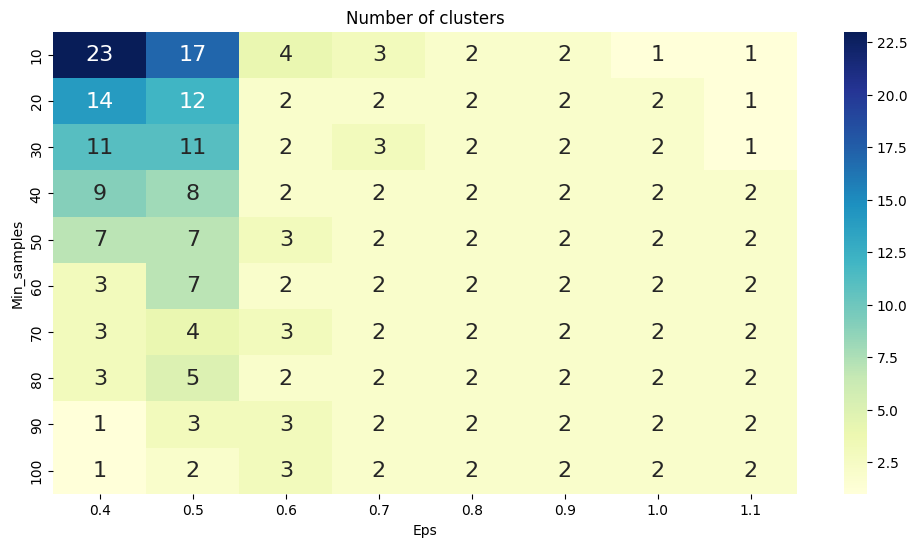

In [140]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

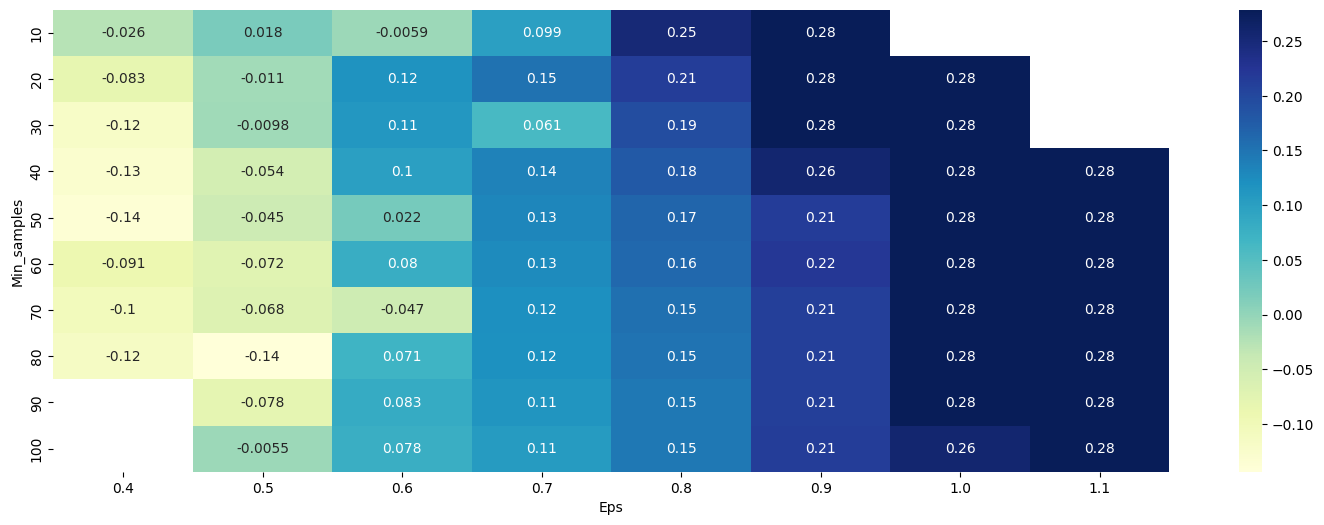

In [141]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

We can take a value of $0.083$ with $min\_samples = 90, eps = 0.6$ and $3$ clusters (including outliers).

In [144]:
DBS_clustering = DBSCAN(eps=0.6, min_samples=90).fit(df_dbscan_min_max_scaled)

df_dbscan_alabama_min_max_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_min_max_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [145]:
df_dbscan_alabama_min_max_clustered['Cluster'].value_counts()

-1    1266
 1    1102
 0     215
Name: Cluster, dtype: int64

In [146]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
44,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,279.3,0.044444,0.0,0.000,0.000000,0
158,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,352.8,0.022222,0.0,0.000,0.000000,0
220,34.7442,-86.5912,26.0,0.0,15.8,0.0,0.000000,0.0,0.744241,410.8,0.000000,0.0,0.000,0.000000,0
222,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,604.8,0.086957,0.0,0.125,0.142857,-1
339,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,367.5,0.136364,0.0,0.200,0.000000,-1


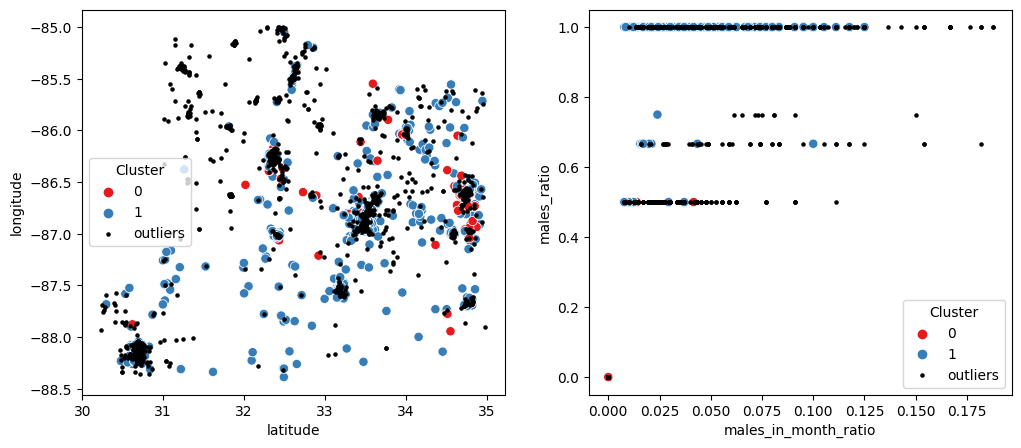

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()


## Final Comments
As we have seen, in terms of `Silhouette Score`, we got the best results **without** normalizing the data, with a score of $0.31$ and $2$ clusters (plus outliers). Instead, normalization seems to penalize the final results, getting $0.075$ and $0.083$ with $3$ and $2$ clusters (plus outliers).

Interpretability is still an issue for us, and we will work towards better interpretability for the final delivery.